# Домашнее задание

Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.
 
 
Также ответьте на вопрос:
Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.


In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import spearmanr
from scipy.stats import ttest_ind

Объедините два массива в DataFrame.
Обоснуйте выбор теста на корреляцию.
Сделайте вывод по гипотезе.
Ответьте на вопрос: Какова разница в среднем размере мидии в зависимости от города-производителя
Обоснуйте выбор теста.
Сделайте вывод по гипотезе.

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764


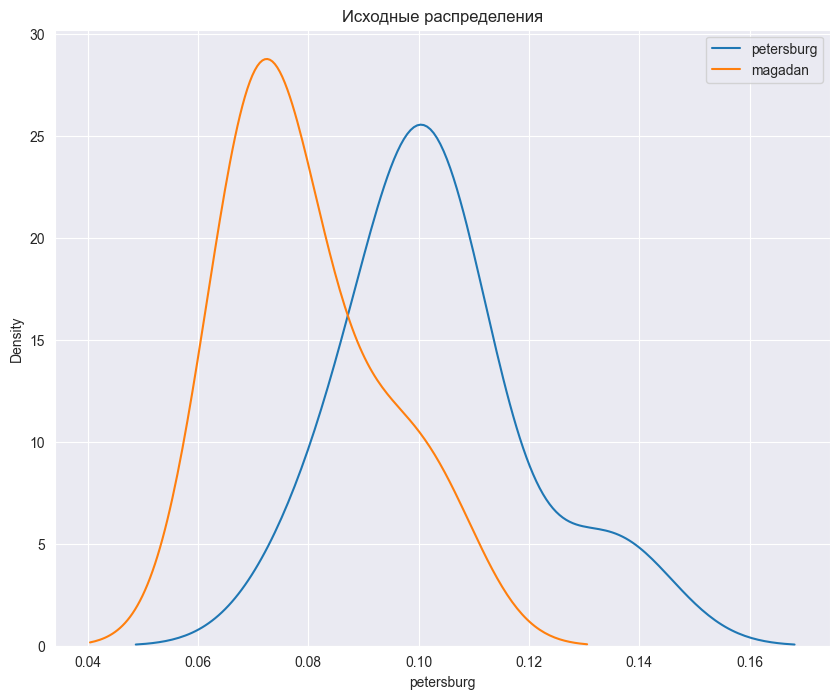

In [66]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan    = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]

# данные "склеим zip-ом, за одно приведем массивы к одной размерности, что бы в dataframe не получить NaN"

df = pd.DataFrame(list(zip(petersburg, magadan)), columns=['petersburg', 'magadan'])
display(df)

# смотрим на распределение, ну просто интересно :)
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

sns.kdeplot(df['petersburg'], ax=ax1, label ='petersburg')
sns.kdeplot(df['magadan'], ax=ax1, label ='magadan')
plt.legend()

Что бы сделать выбор теста на корреляцию нужно узнать как распределены данные.

In [70]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально'

alpha = 0.05

_, p = shapiro(df)

# Интерпретация

if p > alpha:
    print(f'{p} > {alpha} {H0}')
else:
    print(f'{p} <= {alpha} {Ha}')

0.2256876528263092 > 0.05 Данные распределены нормально


Выдвигаем гипотезу, что между данными нет зависимости. Т.к. данные представляют собой количественные переменные, то выбираем корреляцию по методу Спирмена.

In [68]:
H0 = 'Между данными нет записимости'
Ha = 'Между данными есть зависимость (мы отвергаем H0)'

corr, p = spearmanr(df['petersburg'], df['magadan'])

alpha = 0.05

if p > alpha:
    print(f'{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между данными.')
else:
    print(f'{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между данными.')


0.7599453002180929 > 0.05. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между данными.


Делаем промежуточный вывод: Данные в выборе распределены номально и нам не удалось опровегнуть гипотезу, что между данными нет зависимости.

Теперь воспользуемся алгоритмом, что бы выбрать тест на сравнение выборок.

Данные распределены по нормальному закону. ->
Нужно сделать параметрический тест. ->
Тип зависимы переменных - количественная, непрерывная. ->
Сравнивается 2 группы. ->
Размер выборки < 30. ->
Делаем t-тест.

Ну или проще: Зависимая переменная (средний размер мидии) является количественной. Группы происходят из разных совокупностей. Следовательно, используем независимый T-тест.

Выдвигаем гипотезу - Нет значимой разницы в размере мидии в зависимости от города производителя, и попробуем ее опровергнуть.

In [69]:
H0 = 'Нет значимой разницы в размере мидии в зависимости от города производителя.'
Ha = 'Есть значимая разница в размере мидии в зависимости от города производителя.'

alpha = 0.05

test_results = round(ttest_ind(df['petersburg'], df['magadan'], equal_var=True)[1], 2)

if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

0.7599453002180929 > 0.05. Мы не можем отвергнуть нулевую гипотезу. Нет значимой разницы в размере мидии в зависимости от города производителя.


Подводим итог, из предоставленных данным мы собрам DataFrame, данные в нем распределены нормально, и не удалом сходу опровергнуть гипотезу, что между ними нет связи.

Был проведен независимый т-тест для проверки гипотезы, что нет заначимой разницы в размере раковины мидии в зависимости от города произодителя. Эту гипотезу не удалось опровегнуть, следовательно, делаем вывод, что нет значимой разницы в размере раковины мидии в зависимости от города производителя на основании предоставленной выборке.